In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data_Crime_Cleaning.csv")
df.head(10)

,id_report,date_report,date_ocurrance,time_ocurrance,area_code,area_name,district,crime_severity,crime_code,crime_desc,...,latitude,longitude,area_valid,crime_ucr,month_report,year_report,year_month_report,month_ocurrance,year_ocurrance,year_month_ocurrance
0,190326475,2020-03-01,2020-03-01,21:30:00,7,hollywood,784,grave,510,vehicle - stolen,...,34.0375,-118.3506,True,property crime,3,2020,2020-03,3,2020,2020-03
1,200106753,2020-02-09,2020-02-08,18:00:00,1,77th street,182,grave,330,burglary from vehicle,...,34.0444,-118.2628,True,property crime,2,2020,2020-02,2,2020,2020-02
2,200320258,2020-11-11,2020-11-04,17:00:00,3,devonshire,356,grave,480,bike - stolen,...,34.0210,-118.3002,True,property crime,11,2020,2020-11,11,2020,2020-11
3,200907217,2023-05-10,2020-03-10,20:37:00,9,n hollywood,964,grave,343,shoplifting-grand theft ($950.01 & over),...,34.1576,-118.4387,True,property crime,5,2023,2023-05,3,2020,2020-03
4,220614831,2022-08-18,2020-08-17,12:00:00,6,hollenbeck,666,menos grave,354,theft of identity,...,34.0944,-118.3277,True,property crime,8,2022,2022-08,8,2020,2020-08
5,231808869,2023-04-04,2020-12-01,23:00:00,1,77th street,1826,menos grave,354,theft of identity,...,33.9467,-118.2463,True,property crime,4,2023,2023-04,12,2020,2020-12
6,230110144,2023-04-04,2020-07-03,09:00:00,1,77th street,182,menos grave,354,theft of identity,...,34.0415,-118.2620,True,property crime,4,2023,2023-04,7,2020,2020-07
7,220314085,2022-07-22,2020-05-12,11:10:00,3,devonshire,303,menos grave,354,theft of identity,...,34.0335,-118.3537,True,property crime,7,2022,2022-07,5,2020,2020-05
8,231309864,2023-04-28,2020-12-09,14:00:00,1,77th street,1375,menos grave,354,theft of identity,...,33.9911,-118.2521,True,property crime,4,2023,2023-04,12,2020,2020-12
9,211904005,2020-12-31,2020-12-31,12:20:00,1,77th street,1974,menos grave,624,battery - simple assault,...,34.2336,-118.4535,True,violent crime,12,2020,2020-12,12,2020,2020-12


## Ubicaciones con mayores crímenes y armas más utilizadas.


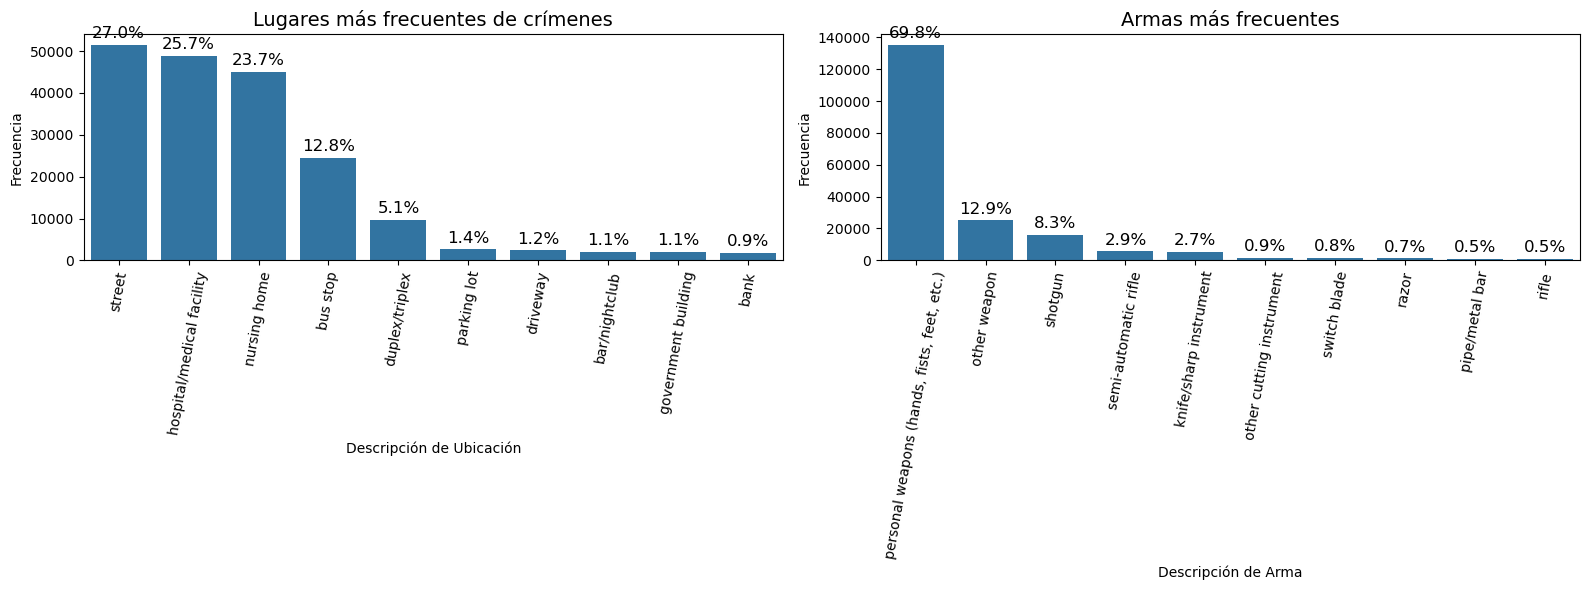

In [4]:
df_clean = df[~df['loc_desc'].str.contains('unknown', case=False, na=False)]
df_clean = df_clean[~df_clean['weapon_desc'].str.contains('unknown', case=False, na=False)]

top_loc_desc = df_clean['loc_desc'].value_counts().nlargest(10).index
df_top_loc_desc = df_clean[df_clean['loc_desc'].isin(top_loc_desc)]

top_weapon_desc = df_clean['weapon_desc'].value_counts().nlargest(10).index
df_top_weapon_desc = df_clean[df_clean['weapon_desc'].isin(top_weapon_desc)]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(data=df_top_loc_desc, x='loc_desc', order=top_loc_desc, ax=axes[0])
total_loc = len(df_top_loc_desc)
for p in axes[0].patches:
    height = p.get_height()
    percentage = (height / total_loc) * 100
    axes[0].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')

axes[0].set_title('Lugares más frecuentes de crímenes', fontsize=14)
axes[0].set_xlabel('Descripción de Ubicación')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=80)

sns.countplot(data=df_top_weapon_desc, x='weapon_desc', order=top_weapon_desc, ax=axes[1])
total_weapon = len(df_top_weapon_desc)
for p in axes[1].patches:
    height = p.get_height()
    percentage = (height / total_weapon) * 100
    axes[1].annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', fontsize=12, color='black', xytext=(0, 8), textcoords='offset points')

axes[1].set_title('Armas más frecuentes', fontsize=14)
axes[1].set_xlabel('Descripción de Arma')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.show()


## Relación entre localizaciones y tipo de arma utilizada

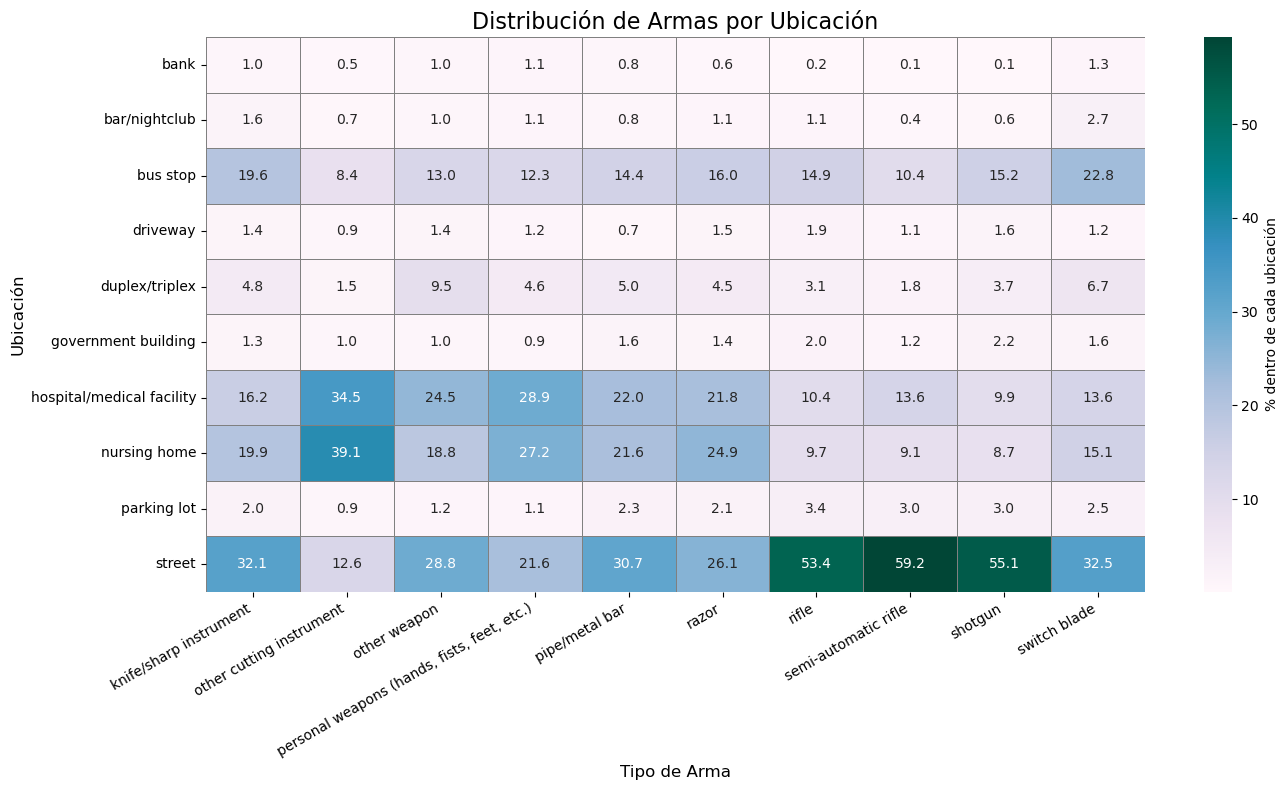

In [6]:
df_clean = df[~df['loc_desc'].str.contains('unknown', case=False, na=False)]
df_clean = df_clean[~df_clean['weapon_desc'].str.contains('unknown', case=False, na=False)]

top_locs = df_clean['loc_desc'].value_counts().nlargest(10).index
top_weapons = df_clean['weapon_desc'].value_counts().nlargest(10).index
df_filtered = df_clean[df_clean['loc_desc'].isin(top_locs) & df_clean['weapon_desc'].isin(top_weapons)]

heatmap_data = pd.crosstab(df_filtered['loc_desc'], df_filtered['weapon_desc'], normalize='columns') * 100

plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap='PuBuGn',  # paleta suave
    linewidths=0.5, 
    linecolor='gray',
    cbar_kws={'label': '% dentro de cada ubicación'}
)

plt.title('Distribución de Armas por Ubicación', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=12)
plt.ylabel('Ubicación', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

## Gravedad de crímenes según arma y ubicación.
    ·Agrupación de armas para mejor legibilidad del mapa.

In [8]:
df_clean = df[
    ~df['loc_desc'].str.contains('unknown', case=False, na=False) &
    ~df['weapon_desc'].str.contains('unknown', case=False, na=False) &
    ~df['crime_severity'].isna()
]

top_weapons = df_clean['weapon_desc'].value_counts().nlargest(10).index
top_locs = df_clean['loc_desc'].value_counts().nlargest(10).index

df_filtered = df_clean[
    df_clean['weapon_desc'].isin(top_weapons) &
    df_clean['loc_desc'].isin(top_locs)
]


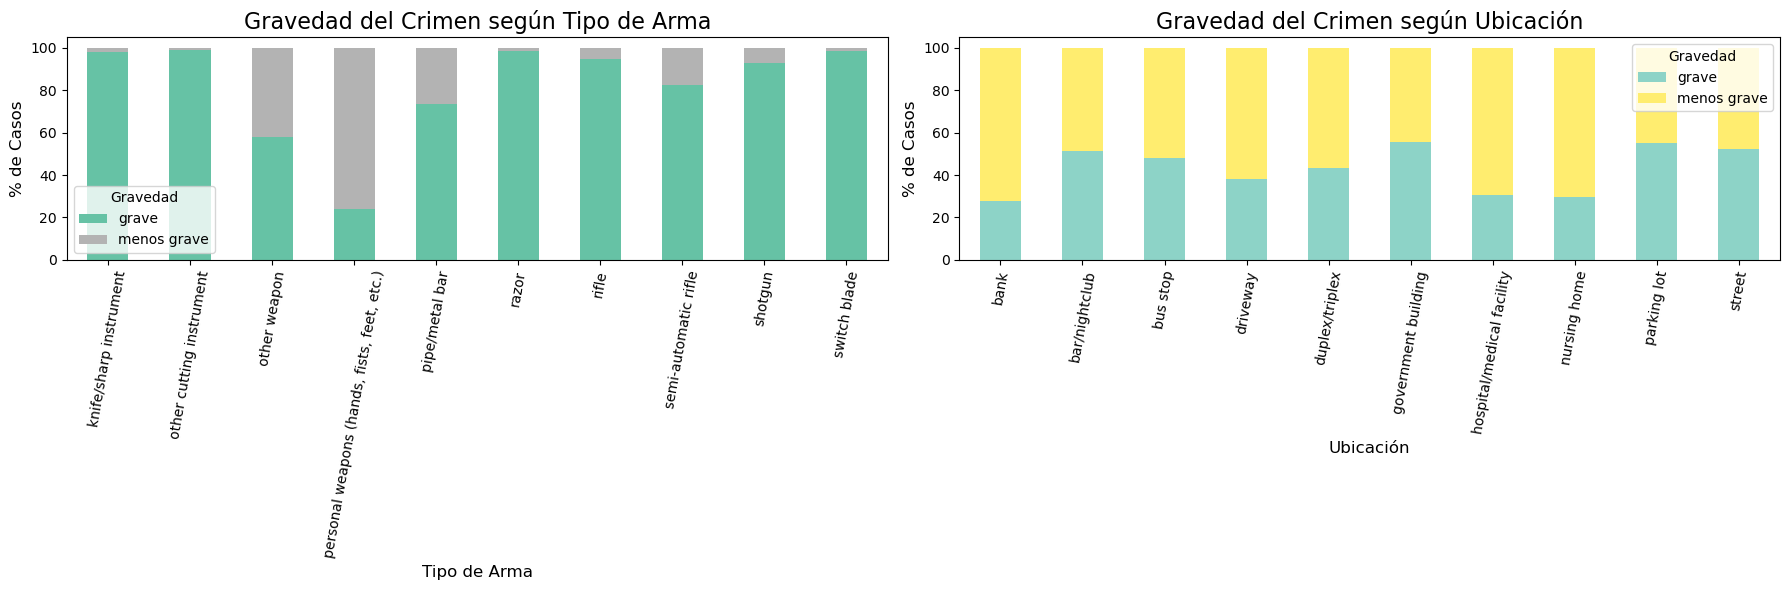

In [9]:
weapon_severity = pd.crosstab(df_filtered['weapon_desc'], df_filtered['crime_severity'], normalize='index') * 100

loc_severity = pd.crosstab(df_filtered['loc_desc'], df_filtered['crime_severity'], normalize='index') * 100

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

weapon_severity.plot(kind='bar', stacked=True, colormap='Set2', ax=axes[0])
axes[0].set_title('Gravedad del Crimen según Tipo de Arma', fontsize=16)
axes[0].set_ylabel('% de Casos', fontsize=12)
axes[0].set_xlabel('Tipo de Arma', fontsize=12)
axes[0].tick_params(axis='x', rotation=80, labelsize=10)
axes[0].legend(title='Gravedad')


loc_severity.plot(kind='bar', stacked=True, colormap='Set3', ax=axes[1])
axes[1].set_title('Gravedad del Crimen según Ubicación', fontsize=16)
axes[1].set_ylabel('% de Casos', fontsize=12)
axes[1].set_xlabel('Ubicación', fontsize=12)
axes[1].tick_params(axis='x', rotation=80, labelsize=10)
axes[1].legend(title='Gravedad')


plt.subplots_adjust(wspace=0.3)

plt.tight_layout()
plt.show()

